In [22]:
#Importing the important module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import InputLayer,Dense
from glob import glob
from keras.optimizers import Adam

In [3]:
#Mouting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
#Unziping the zip file which contain train images
!unzip /content/drive/MyDrive/train_nLPp5K8.zip

In [4]:
#reading the csv file (Train and test)
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test_fkwGUNG.csv')

In [5]:
# create random number generator
seed=42
rseed=np.random.RandomState(seed)

In [6]:
# top five train data
train_data.head()

,image_names,class
0,11413.jpg,1
1,9863.jpg,1
2,997.jpg,0
3,5950.jpg,0
4,10454.jpg,1


In [7]:
#Top five test data
test_data.head()

,image_names
0,5603.jpg
1,1286.jpg
2,9815.jpg
3,8865.jpg
4,9306.jpg


In [8]:
#counts of different classes
train_data['class'].value_counts()

1    6174
0    6022
Name: class, dtype: int64

In [9]:
#module for reading ,saving,showing and resizing the image
from skimage.io import imread,imsave,imshow
from skimage.transform import resize

In [10]:
#reading the image in gray scale and storing in numpy array
X=[]
for image in train_data.image_names:
  img=imread('images/'+image,as_gray=True)
  X.append(img)
X=np.array(X)
y=train_data['class']

In [11]:
#reading the image in gray scale and storing in numpy array
X_test=[]
for image in test_data.image_names:
  img=imread('images/'+image,as_gray=True)
  X_test.append(img)
X_test=np.array(X_test)


In [12]:
# resizing the image of test
final_re_image_test=[]
for i in range(len(X_test)):
    temp=resize(X_test[i],(100,100))
    final_re_image_test.append(temp)
final_re_image_test=np.array(final_re_image_test)
X_test=final_re_image_test

In [13]:
#resizing the image of train to 100 ,100 because of google colab to avoid ram outof memory
final_re_image=[]
for i in range(len(X)):
    temp=resize(X[i],(100,100))
    final_re_image.append(temp)
final_re_image=np.array(final_re_image)
X=final_re_image

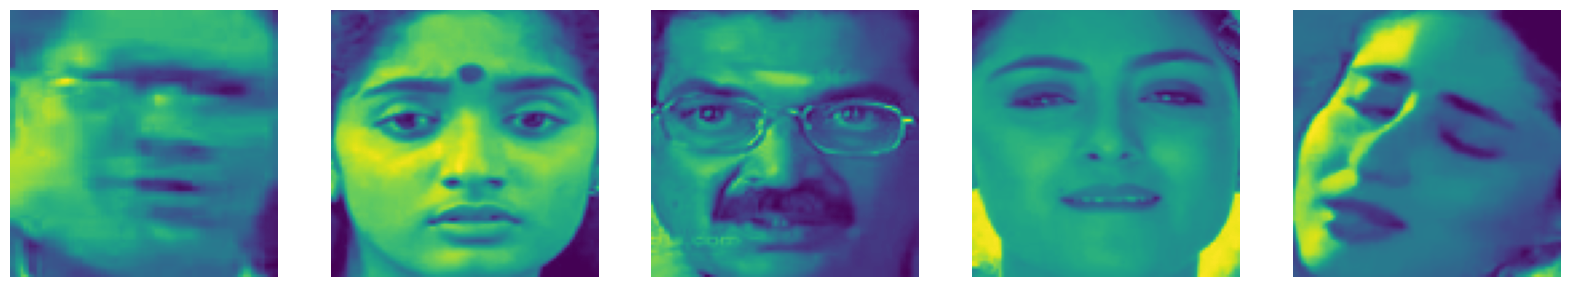

In [15]:
fig,ax=plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
  ax[i].imshow(X[i*400])
  ax[i].axis('off')

In [16]:
# libraries for performing image augmentation tasks
from skimage.transform import rotate
from skimage.util import random_noise
from skimage.filters import gaussian
from skimage.transform import AffineTransform, warp

In [17]:
# augmenting the training images
final_train_data = []
final_target_train = []
for i in range(10000,train_data.shape[0]):
    # original image
    final_train_data.append(X[i])
    # image rotation
    final_train_data.append(rotate(X[i], angle=30, mode = 'edge'))
    # image flipping (left-to-right)
    final_train_data.append(np.fliplr(X[i]))
    # image flipping (up-down)
    final_train_data.append(np.flipud(X[i]))
    # image noising
    final_train_data.append(random_noise(X[i],var=0.2))
    for j in range(5):
        final_target_train.append(y[i])

In [18]:
# converting images and target to array
X = np.array(final_train_data)
y= np.array(final_target_train)

In [19]:
#shape of train images and test images
X.shape,X_test.shape

((10980, 100, 100), (5227, 100, 100))

In [20]:
#converting 2 dimensional image to 1 dimensional image
X=X.reshape(X.shape[0],100*100)
X_test=X_test.reshape(X_test.shape[0],100*100)

In [21]:
#Normalizing the pixles values
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)
X_test=ss.fit_transform(X_test)

**prevent overfitting**

In [28]:
# importing the dropout layer
from keras.layers import Dropout
# importing batch normalization layer
from keras.layers import BatchNormalization
#importing the optimizer
from keras.optimizers import Adam
# importing different initialization techniques
from keras.initializers import random_normal, glorot_normal, he_normal
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(lr=1e-5, clipvalue=1)
# importing module for early stopping
from keras.callbacks import EarlyStopping

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [29]:
# defining the architecture of the model
model=Sequential()
model.add(InputLayer(input_shape=X.shape[1],))
model.add(Dense(100,activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(50,activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(1,activation='sigmoid'))

In [30]:
# summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               1000100   
                                                                 
 batch_normalization_2 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 batch_normalization_3 (Batc  (None, 50)               200       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 50)               

In [31]:
# compiling the model
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

In [32]:
# training the model
model_history=model.fit(X,y,epochs=50,batch_size=200)

Epoch 1/50
55/55 [==============================] - 5s 9ms/step - loss: 0.9602 - accuracy: 0.5440
Epoch 2/50
55/55 [==============================] - 0s 9ms/step - loss: 0.8760 - accuracy: 0.5929
Epoch 3/50
55/55 [==============================] - 1s 9ms/step - loss: 0.8641 - accuracy: 0.6009
Epoch 4/50
55/55 [==============================] - 1s 9ms/step - loss: 0.8453 - accuracy: 0.6119
Epoch 5/50
55/55 [==============================] - 0s 9ms/step - loss: 0.8366 - accuracy: 0.6124
Epoch 6/50
55/55 [==============================] - 0s 9ms/step - loss: 0.8260 - accuracy: 0.6149
Epoch 7/50
55/55 [==============================] - 1s 9ms/step - loss: 0.8066 - accuracy: 0.6243
Epoch 8/50
55/55 [==============================] - 1s 9ms/step - loss: 0.7958 - accuracy: 0.6260
Epoch 9/50
55/55 [==============================] - 1s 12ms/step - loss: 0.7831 - accuracy: 0.6330
Epoch 10/50
55/55 [==============================] - 1s 12ms/step - loss: 0.7963 - accuracy: 0.6287
Epoch 11/50
55/55

In [33]:
# getting predictions in the form of probabilities
#prediction for test data
prediction_probabilities_test = model.predict(X_test)[:,0]

164/164 [==============================] - 0s 2ms/step


In [35]:
#test image probalilites
prediction_probabilities_test

array([0.9831607 , 0.97818667, 0.17418773, ..., 0.669526  , 0.33276963,
       0.01288433], dtype=float32)

In [36]:
# converting probabilities to classes
prediction_probabilities_test= prediction_probabilities_test >= 0.5
prediction_probabilities_test = prediction_probabilities_test.astype(np.int)

<ipython-input-36-a752ba281fee>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prediction_probabilities_test = prediction_probabilities_test.astype(np.int)


In [37]:
prediction_probabilities_test

array([1, 1, 0, ..., 1, 0, 0])

In [38]:
#Importing metrics
from sklearn.metrics import accuracy_score

In [39]:
#predicting for train data
prediction_probabilities_train = model.predict(X)[:,0]

344/344 [==============================] - 1s 2ms/step


In [40]:
# converting probabilities to classes
prediction_probabilities_train= prediction_probabilities_train >= 0.5
prediction_probabilities_train = prediction_probabilities_train.astype(np.int)

<ipython-input-40-a09d02674339>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prediction_probabilities_train = prediction_probabilities_train.astype(np.int)


In [41]:
prediction_probabilities_train

array([0, 0, 0, ..., 1, 0, 0])

In [42]:
# accuracy on training set
accuracy_score(y,prediction_probabilities_train)

0.7612932604735884

Model is 0 % sure that it is male
0


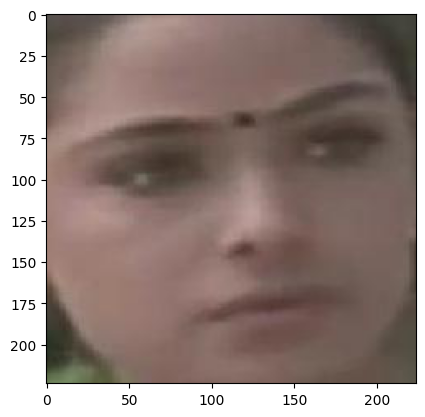

In [44]:
# pulling out the original images from the data which correspond to the validation data
import random as rng
# get a random index to plot image randomly
index = rng.choice(range(len(test_data)))

# get the corresponding image name and probability
img_name = test_data['image_names'][index]
prob = (prediction_probabilities_test * 100).astype(int)[index]

# read the image
img = plt.imread('images/' + img_name)

# print probability and actual class
print('Model is', prob , '% sure that it is male')
print(prediction_probabilities_test[index])
# plot image
plt.imshow(img)

Adding weight initializers

In [45]:
# defining the architecture of the model
model=Sequential()
model.add(InputLayer(input_shape=X.shape[1],))
model.add(Dense(100,activation='sigmoid',kernel_initializer=he_normal(seed=seed)))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(50,activation='sigmoid',kernel_initializer=he_normal(seed=seed)))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(1,activation='sigmoid',kernel_initializer=he_normal(seed=seed)))

In [46]:
# summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               1000100   
                                                                 
 batch_normalization_4 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 50)                5050      
                                                                 
 batch_normalization_5 (Batc  (None, 50)               200       
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 50)               

In [47]:
# compiling the model
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

In [48]:
# training the model
model_history=model.fit(X,y,epochs=50,batch_size=200)


Epoch 1/50
55/55 [==============================] - 2s 12ms/step - loss: 0.8889 - accuracy: 0.5959
Epoch 2/50
55/55 [==============================] - 1s 12ms/step - loss: 0.8033 - accuracy: 0.6172
Epoch 3/50
55/55 [==============================] - 1s 10ms/step - loss: 0.8015 - accuracy: 0.6243
Epoch 4/50
55/55 [==============================] - 1s 9ms/step - loss: 0.7746 - accuracy: 0.6344
Epoch 5/50
55/55 [==============================] - 1s 9ms/step - loss: 0.7616 - accuracy: 0.6411
Epoch 6/50
55/55 [==============================] - 1s 9ms/step - loss: 0.7604 - accuracy: 0.6395
Epoch 7/50
55/55 [==============================] - 1s 9ms/step - loss: 0.7544 - accuracy: 0.6431
Epoch 8/50
55/55 [==============================] - 1s 9ms/step - loss: 0.7499 - accuracy: 0.6510
Epoch 9/50
55/55 [==============================] - 1s 9ms/step - loss: 0.7339 - accuracy: 0.6490
Epoch 10/50
55/55 [==============================] - 0s 9ms/step - loss: 0.7241 - accuracy: 0.6512
Epoch 11/50
55/5

In [51]:
# getting predictions in the form of probabilities
#prediction for test data
prediction_probabilities_test = model.predict(X_test)[:,0]

164/164 [==============================] - 0s 2ms/step


In [95]:
# converting probabilities to classes
prediction_probabilities_test= prediction_probabilities_test >= 0.5
prediction_probabilities_test = prediction_probabilities_test.astype(np.int)

In [96]:
#predicting for train data
prediction_probabilities_train = model.predict(X)[:,0]
# converting probabilities to classes
prediction_probabilities_train= prediction_probabilities_train >= 0.5
prediction_probabilities_train = prediction_probabilities_train.astype(np.int)

In [63]:
# accuracy on training set
a=accuracy_score(y,prediction_probabilities_train)
print('accuracy_score',a)

accuracy_score 0.7816939890710383


Model is 0 % sure that it is male
0


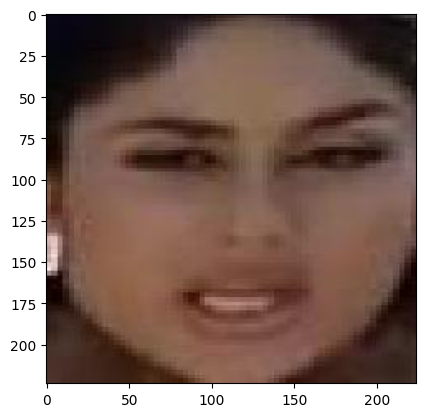

In [98]:
# pulling out the original images from the data which correspond to the validation data
import random as rng
# get a random index to plot image randomly
index = rng.choice(range(len(test_data)))

# get the corresponding image name and probability
img_name = test_data['image_names'][index]
prob = (prediction_probabilities_test * 100).astype(int)[index]

# read the image
img = plt.imread('images/' + img_name)

# print probability and actual class
print('Model is', prob , '% sure that it is male')
print(prediction_probabilities_test[index])
# plot image
plt.imshow(img)

Early stopping

In [64]:
# increasing the patience and threshold value
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=10, mode='min')

In [67]:
# defining the architecture of the model
model=Sequential()
model.add(InputLayer(input_shape=X.shape[1],))
model.add(Dense(100,activation='sigmoid',kernel_initializer=he_normal(seed=seed)))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(50,activation='sigmoid',kernel_initializer=he_normal(seed=seed)))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(1,activation='sigmoid',kernel_initializer=he_normal(seed=seed)))

In [68]:
# compiling the model
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

In [69]:
# training the model
model_history=model.fit(X,y,epochs=100,batch_size=200,callbacks=[early_stopping])

Epoch 1/100
55/55 [==============================] - ETA: 0s - loss: 0.8831 - accuracy: 0.5934

55/55 [==============================] - 1s 9ms/step - loss: 0.8831 - accuracy: 0.5934
Epoch 2/100
54/55 [============================>.] - ETA: 0s - loss: 0.8118 - accuracy: 0.6210

55/55 [==============================] - 1s 9ms/step - loss: 0.8123 - accuracy: 0.6206
Epoch 3/100
51/55 [==========================>...] - ETA: 0s - loss: 0.7791 - accuracy: 0.6281

55/55 [==============================] - 0s 9ms/step - loss: 0.7803 - accuracy: 0.6262
Epoch 4/100
51/55 [==========================>...] - ETA: 0s - loss: 0.7857 - accuracy: 0.6254

55/55 [==============================] - 0s 9ms/step - loss: 0.7792 - accuracy: 0.6285
Epoch 5/100
50/55 [==========================>...] - ETA: 0s - loss: 0.7624 - accuracy: 0.6439

55/55 [==============================] - 0s 9ms/step - loss: 0.7616 - accuracy: 0.6433
Epoch 6/100
52/55 [===========================>..] - ETA: 0s - loss: 0.7349 - accuracy: 0.6490

55/55 [==============================] - 0s 8ms/step - loss: 0.7350 - accuracy: 0.6482
Epoch 7/100
52/55 [===========================>..] - ETA: 0s - loss: 0.7532 - accuracy: 0.6479

55/55 [==============================] - 0s 9ms/step - loss: 0.7547 - accuracy: 0.6486
Epoch 8/100
53/55 [===========================>..] - ETA: 0s - loss: 0.7279 - accuracy: 0.6509

55/55 [==============================] - 0s 9ms/step - loss: 0.7271 - accuracy: 0.6519
Epoch 9/100
51/55 [==========================>...] - ETA: 0s - loss: 0.7377 - accuracy: 0.6549

55/55 [==============================] - 0s 9ms/step - loss: 0.7381 - accuracy: 0.6533
Epoch 10/100
50/55 [==========================>...] - ETA: 0s - loss: 0.7214 - accuracy: 0.6573

55/55 [==============================] - 0s 9ms/step - loss: 0.7253 - accuracy: 0.6558
Epoch 11/100
50/55 [==========================>...] - ETA: 0s - loss: 0.7195 - accuracy: 0.6596

55/55 [==============================] - 0s 9ms/step - loss: 0.7203 - accuracy: 0.6593
Epoch 12/100
55/55 [==============================] - ETA: 0s - loss: 0.7249 - accuracy: 0.6536

55/55 [==============================] - 1s 9ms/step - loss: 0.7249 - accuracy: 0.6536
Epoch 13/100
51/55 [==========================>...] - ETA: 0s - loss: 0.7074 - accuracy: 0.6644

55/55 [==============================] - 0s 9ms/step - loss: 0.7046 - accuracy: 0.6642
Epoch 14/100
50/55 [==========================>...] - ETA: 0s - loss: 0.7107 - accuracy: 0.6555

55/55 [==============================] - 0s 9ms/step - loss: 0.7104 - accuracy: 0.6559
Epoch 15/100
52/55 [===========================>..] - ETA: 0s - loss: 0.7025 - accuracy: 0.6693

55/55 [==============================] - 1s 11ms/step - loss: 0.7054 - accuracy: 0.6677
Epoch 16/100
53/55 [===========================>..] - ETA: 0s - loss: 0.6872 - accuracy: 0.6762

55/55 [==============================] - 1s 12ms/step - loss: 0.6895 - accuracy: 0.6752
Epoch 17/100
53/55 [===========================>..] - ETA: 0s - loss: 0.6963 - accuracy: 0.6708

55/55 [==============================] - 1s 12ms/step - loss: 0.7020 - accuracy: 0.6679
Epoch 18/100
54/55 [============================>.] - ETA: 0s - loss: 0.6855 - accuracy: 0.6703

55/55 [==============================] - 1s 11ms/step - loss: 0.6853 - accuracy: 0.6707
Epoch 19/100
51/55 [==========================>...] - ETA: 0s - loss: 0.6976 - accuracy: 0.6655

55/55 [==============================] - 1s 11ms/step - loss: 0.6965 - accuracy: 0.6652
Epoch 20/100
53/55 [===========================>..] - ETA: 0s - loss: 0.6839 - accuracy: 0.6725

55/55 [==============================] - 1s 12ms/step - loss: 0.6842 - accuracy: 0.6730
Epoch 21/100
54/55 [============================>.] - ETA: 0s - loss: 0.6693 - accuracy: 0.6853

55/55 [==============================] - 1s 10ms/step - loss: 0.6703 - accuracy: 0.6852
Epoch 22/100
52/55 [===========================>..] - ETA: 0s - loss: 0.6722 - accuracy: 0.6771

55/55 [==============================] - 0s 9ms/step - loss: 0.6728 - accuracy: 0.6768
Epoch 23/100
51/55 [==========================>...] - ETA: 0s - loss: 0.6832 - accuracy: 0.6761

55/55 [==============================] - 0s 9ms/step - loss: 0.6839 - accuracy: 0.6753
Epoch 24/100
54/55 [============================>.] - ETA: 0s - loss: 0.6686 - accuracy: 0.6786

55/55 [==============================] - 0s 8ms/step - loss: 0.6683 - accuracy: 0.6791
Epoch 25/100
53/55 [===========================>..] - ETA: 0s - loss: 0.6669 - accuracy: 0.6837

55/55 [==============================] - 1s 9ms/step - loss: 0.6660 - accuracy: 0.6841
Epoch 26/100
55/55 [==============================] - ETA: 0s - loss: 0.6670 - accuracy: 0.6814

55/55 [==============================] - 0s 8ms/step - loss: 0.6670 - accuracy: 0.6814
Epoch 27/100
54/55 [============================>.] - ETA: 0s - loss: 0.6543 - accuracy: 0.6874

55/55 [==============================] - 1s 9ms/step - loss: 0.6558 - accuracy: 0.6869
Epoch 28/100
52/55 [===========================>..] - ETA: 0s - loss: 0.6605 - accuracy: 0.6896

55/55 [==============================] - 0s 9ms/step - loss: 0.6596 - accuracy: 0.6911
Epoch 29/100
50/55 [==========================>...] - ETA: 0s - loss: 0.6615 - accuracy: 0.6810

55/55 [==============================] - 0s 9ms/step - loss: 0.6631 - accuracy: 0.6810
Epoch 30/100
51/55 [==========================>...] - ETA: 0s - loss: 0.6529 - accuracy: 0.6865

55/55 [==============================] - 0s 9ms/step - loss: 0.6518 - accuracy: 0.6871
Epoch 31/100
54/55 [============================>.] - ETA: 0s - loss: 0.6449 - accuracy: 0.6890

55/55 [==============================] - 1s 9ms/step - loss: 0.6436 - accuracy: 0.6890
Epoch 32/100
55/55 [==============================] - ETA: 0s - loss: 0.6483 - accuracy: 0.6931

55/55 [==============================] - 0s 9ms/step - loss: 0.6483 - accuracy: 0.6931
Epoch 33/100
55/55 [==============================] - ETA: 0s - loss: 0.6490 - accuracy: 0.6936

55/55 [==============================] - 1s 9ms/step - loss: 0.6490 - accuracy: 0.6936
Epoch 34/100
53/55 [===========================>..] - ETA: 0s - loss: 0.6580 - accuracy: 0.6861

55/55 [==============================] - 1s 9ms/step - loss: 0.6566 - accuracy: 0.6865
Epoch 35/100
51/55 [==========================>...] - ETA: 0s - loss: 0.6500 - accuracy: 0.6889

55/55 [==============================] - 1s 10ms/step - loss: 0.6485 - accuracy: 0.6902
Epoch 36/100
51/55 [==========================>...] - ETA: 0s - loss: 0.6462 - accuracy: 0.6903

55/55 [==============================] - 0s 9ms/step - loss: 0.6469 - accuracy: 0.6904
Epoch 37/100
55/55 [==============================] - ETA: 0s - loss: 0.6454 - accuracy: 0.6968

55/55 [==============================] - 1s 9ms/step - loss: 0.6454 - accuracy: 0.6968
Epoch 38/100
52/55 [===========================>..] - ETA: 0s - loss: 0.6369 - accuracy: 0.7000

55/55 [==============================] - 1s 9ms/step - loss: 0.6365 - accuracy: 0.6989
Epoch 39/100
54/55 [============================>.] - ETA: 0s - loss: 0.6438 - accuracy: 0.6953

55/55 [==============================] - 1s 9ms/step - loss: 0.6449 - accuracy: 0.6944
Epoch 40/100
52/55 [===========================>..] - ETA: 0s - loss: 0.6313 - accuracy: 0.7007

55/55 [==============================] - 0s 9ms/step - loss: 0.6323 - accuracy: 0.7011
Epoch 41/100
51/55 [==========================>...] - ETA: 0s - loss: 0.6358 - accuracy: 0.6955

55/55 [==============================] - 1s 12ms/step - loss: 0.6361 - accuracy: 0.6951
Epoch 42/100
55/55 [==============================] - ETA: 0s - loss: 0.6166 - accuracy: 0.7028

55/55 [==============================] - 1s 11ms/step - loss: 0.6166 - accuracy: 0.7028
Epoch 43/100
53/55 [===========================>..] - ETA: 0s - loss: 0.6338 - accuracy: 0.6973

55/55 [==============================] - 1s 12ms/step - loss: 0.6308 - accuracy: 0.6985
Epoch 44/100
55/55 [==============================] - ETA: 0s - loss: 0.6365 - accuracy: 0.6974

55/55 [==============================] - 1s 12ms/step - loss: 0.6365 - accuracy: 0.6974
Epoch 45/100
53/55 [===========================>..] - ETA: 0s - loss: 0.6174 - accuracy: 0.7021

55/55 [==============================] - 1s 12ms/step - loss: 0.6157 - accuracy: 0.7029
Epoch 46/100
53/55 [===========================>..] - ETA: 0s - loss: 0.6272 - accuracy: 0.7085

55/55 [==============================] - 1s 12ms/step - loss: 0.6302 - accuracy: 0.7075
Epoch 47/100
50/55 [==========================>...] - ETA: 0s - loss: 0.6200 - accuracy: 0.7064

55/55 [==============================] - 1s 11ms/step - loss: 0.6228 - accuracy: 0.7062
Epoch 48/100
55/55 [==============================] - ETA: 0s - loss: 0.6209 - accuracy: 0.7037

55/55 [==============================] - 0s 8ms/step - loss: 0.6209 - accuracy: 0.7037
Epoch 49/100
52/55 [===========================>..] - ETA: 0s - loss: 0.6253 - accuracy: 0.7021

55/55 [==============================] - 0s 9ms/step - loss: 0.6268 - accuracy: 0.7014
Epoch 50/100
49/55 [=========================>....] - ETA: 0s - loss: 0.6188 - accuracy: 0.7021

55/55 [==============================] - 0s 8ms/step - loss: 0.6197 - accuracy: 0.7021
Epoch 51/100
53/55 [===========================>..] - ETA: 0s - loss: 0.6211 - accuracy: 0.7039

55/55 [==============================] - 0s 8ms/step - loss: 0.6209 - accuracy: 0.7039
Epoch 52/100
52/55 [===========================>..] - ETA: 0s - loss: 0.6109 - accuracy: 0.7088

55/55 [==============================] - 0s 9ms/step - loss: 0.6126 - accuracy: 0.7085
Epoch 53/100
55/55 [==============================] - ETA: 0s - loss: 0.6107 - accuracy: 0.7077

55/55 [==============================] - 1s 9ms/step - loss: 0.6107 - accuracy: 0.7077
Epoch 54/100
53/55 [===========================>..] - ETA: 0s - loss: 0.6050 - accuracy: 0.7132

55/55 [==============================] - 0s 8ms/step - loss: 0.6071 - accuracy: 0.7118
Epoch 55/100
53/55 [===========================>..] - ETA: 0s - loss: 0.5983 - accuracy: 0.7145

55/55 [==============================] - 0s 9ms/step - loss: 0.5975 - accuracy: 0.7152
Epoch 56/100
55/55 [==============================] - ETA: 0s - loss: 0.6107 - accuracy: 0.7066

55/55 [==============================] - 0s 9ms/step - loss: 0.6107 - accuracy: 0.7066
Epoch 57/100
50/55 [==========================>...] - ETA: 0s - loss: 0.6137 - accuracy: 0.7106

55/55 [==============================] - 0s 9ms/step - loss: 0.6134 - accuracy: 0.7116
Epoch 58/100
52/55 [===========================>..] - ETA: 0s - loss: 0.6127 - accuracy: 0.7093

55/55 [==============================] - 0s 9ms/step - loss: 0.6138 - accuracy: 0.7091
Epoch 59/100
53/55 [===========================>..] - ETA: 0s - loss: 0.6075 - accuracy: 0.7119

55/55 [==============================] - 0s 9ms/step - loss: 0.6083 - accuracy: 0.7118
Epoch 60/100
52/55 [===========================>..] - ETA: 0s - loss: 0.6049 - accuracy: 0.7134

55/55 [==============================] - 0s 8ms/step - loss: 0.6044 - accuracy: 0.7137
Epoch 61/100
51/55 [==========================>...] - ETA: 0s - loss: 0.6021 - accuracy: 0.7169

55/55 [==============================] - 0s 9ms/step - loss: 0.6041 - accuracy: 0.7152
Epoch 62/100
50/55 [==========================>...] - ETA: 0s - loss: 0.6079 - accuracy: 0.7071

55/55 [==============================] - 0s 9ms/step - loss: 0.6061 - accuracy: 0.7072
Epoch 63/100
53/55 [===========================>..] - ETA: 0s - loss: 0.5983 - accuracy: 0.7122

55/55 [==============================] - 0s 9ms/step - loss: 0.5973 - accuracy: 0.7134
Epoch 64/100
51/55 [==========================>...] - ETA: 0s - loss: 0.5934 - accuracy: 0.7152

55/55 [==============================] - 0s 9ms/step - loss: 0.5943 - accuracy: 0.7139
Epoch 65/100
55/55 [==============================] - ETA: 0s - loss: 0.5892 - accuracy: 0.7172

55/55 [==============================] - 0s 9ms/step - loss: 0.5892 - accuracy: 0.7172
Epoch 66/100
52/55 [===========================>..] - ETA: 0s - loss: 0.6072 - accuracy: 0.7149

55/55 [==============================] - 0s 9ms/step - loss: 0.6027 - accuracy: 0.7177
Epoch 67/100
53/55 [===========================>..] - ETA: 0s - loss: 0.5992 - accuracy: 0.7144

55/55 [==============================] - 0s 8ms/step - loss: 0.5997 - accuracy: 0.7147
Epoch 68/100
55/55 [==============================] - ETA: 0s - loss: 0.5924 - accuracy: 0.7175

55/55 [==============================] - 1s 11ms/step - loss: 0.5924 - accuracy: 0.7175
Epoch 69/100
51/55 [==========================>...] - ETA: 0s - loss: 0.5966 - accuracy: 0.7182

55/55 [==============================] - 1s 12ms/step - loss: 0.5962 - accuracy: 0.7188
Epoch 70/100
51/55 [==========================>...] - ETA: 0s - loss: 0.5951 - accuracy: 0.7197

55/55 [==============================] - 1s 12ms/step - loss: 0.5938 - accuracy: 0.7187
Epoch 71/100
55/55 [==============================] - ETA: 0s - loss: 0.5959 - accuracy: 0.7142

55/55 [==============================] - 1s 12ms/step - loss: 0.5959 - accuracy: 0.7142
Epoch 72/100
51/55 [==========================>...] - ETA: 0s - loss: 0.5875 - accuracy: 0.7209

55/55 [==============================] - 1s 11ms/step - loss: 0.5855 - accuracy: 0.7220
Epoch 73/100
52/55 [===========================>..] - ETA: 0s - loss: 0.5868 - accuracy: 0.7163

55/55 [==============================] - 1s 12ms/step - loss: 0.5893 - accuracy: 0.7151
Epoch 74/100
54/55 [============================>.] - ETA: 0s - loss: 0.5945 - accuracy: 0.7161

55/55 [==============================] - 1s 10ms/step - loss: 0.5942 - accuracy: 0.7159
Epoch 75/100
54/55 [============================>.] - ETA: 0s - loss: 0.5845 - accuracy: 0.7154

55/55 [==============================] - 0s 9ms/step - loss: 0.5866 - accuracy: 0.7148
Epoch 76/100
53/55 [===========================>..] - ETA: 0s - loss: 0.5741 - accuracy: 0.7251

55/55 [==============================] - 0s 8ms/step - loss: 0.5734 - accuracy: 0.7258
Epoch 77/100
50/55 [==========================>...] - ETA: 0s - loss: 0.5741 - accuracy: 0.7278

55/55 [==============================] - 0s 9ms/step - loss: 0.5763 - accuracy: 0.7274
Epoch 78/100
51/55 [==========================>...] - ETA: 0s - loss: 0.5708 - accuracy: 0.7253

55/55 [==============================] - 0s 9ms/step - loss: 0.5758 - accuracy: 0.7232
Epoch 79/100
55/55 [==============================] - ETA: 0s - loss: 0.5850 - accuracy: 0.7226

55/55 [==============================] - 0s 8ms/step - loss: 0.5850 - accuracy: 0.7226
Epoch 80/100
49/55 [=========================>....] - ETA: 0s - loss: 0.5784 - accuracy: 0.7274

55/55 [==============================] - 0s 9ms/step - loss: 0.5748 - accuracy: 0.7285
Epoch 81/100
52/55 [===========================>..] - ETA: 0s - loss: 0.5687 - accuracy: 0.7303

55/55 [==============================] - 0s 9ms/step - loss: 0.5706 - accuracy: 0.7288
Epoch 82/100
50/55 [==========================>...] - ETA: 0s - loss: 0.5810 - accuracy: 0.7253

55/55 [==============================] - 0s 9ms/step - loss: 0.5784 - accuracy: 0.7261
Epoch 83/100
51/55 [==========================>...] - ETA: 0s - loss: 0.5693 - accuracy: 0.7275

55/55 [==============================] - 0s 9ms/step - loss: 0.5690 - accuracy: 0.7281
Epoch 84/100
54/55 [============================>.] - ETA: 0s - loss: 0.5682 - accuracy: 0.7304

55/55 [==============================] - 0s 9ms/step - loss: 0.5680 - accuracy: 0.7307
Epoch 85/100
52/55 [===========================>..] - ETA: 0s - loss: 0.5758 - accuracy: 0.7330

55/55 [==============================] - 0s 9ms/step - loss: 0.5783 - accuracy: 0.7312
Epoch 86/100
51/55 [==========================>...] - ETA: 0s - loss: 0.5674 - accuracy: 0.7337

55/55 [==============================] - 0s 8ms/step - loss: 0.5649 - accuracy: 0.7339
Epoch 87/100
54/55 [============================>.] - ETA: 0s - loss: 0.5771 - accuracy: 0.7258

55/55 [==============================] - 0s 8ms/step - loss: 0.5777 - accuracy: 0.7249
Epoch 88/100
50/55 [==========================>...] - ETA: 0s - loss: 0.5718 - accuracy: 0.7248

55/55 [==============================] - 0s 9ms/step - loss: 0.5693 - accuracy: 0.7262
Epoch 89/100
51/55 [==========================>...] - ETA: 0s - loss: 0.5797 - accuracy: 0.7214

55/55 [==============================] - 0s 9ms/step - loss: 0.5803 - accuracy: 0.7219
Epoch 90/100
51/55 [==========================>...] - ETA: 0s - loss: 0.5607 - accuracy: 0.7328

55/55 [==============================] - 0s 9ms/step - loss: 0.5592 - accuracy: 0.7333
Epoch 91/100
54/55 [============================>.] - ETA: 0s - loss: 0.5611 - accuracy: 0.7305

55/55 [==============================] - 1s 17ms/step - loss: 0.5619 - accuracy: 0.7301
Epoch 92/100
55/55 [==============================] - ETA: 0s - loss: 0.5639 - accuracy: 0.7312

55/55 [==============================] - 1s 16ms/step - loss: 0.5639 - accuracy: 0.7312
Epoch 93/100
55/55 [==============================] - ETA: 0s - loss: 0.5617 - accuracy: 0.7351

55/55 [==============================] - 1s 12ms/step - loss: 0.5617 - accuracy: 0.7351
Epoch 94/100
53/55 [===========================>..] - ETA: 0s - loss: 0.5609 - accuracy: 0.7324

55/55 [==============================] - 1s 12ms/step - loss: 0.5616 - accuracy: 0.7315
Epoch 95/100
53/55 [===========================>..] - ETA: 0s - loss: 0.5621 - accuracy: 0.7286

55/55 [==============================] - 1s 12ms/step - loss: 0.5612 - accuracy: 0.7291
Epoch 96/100
55/55 [==============================] - ETA: 0s - loss: 0.5622 - accuracy: 0.7342

55/55 [==============================] - 1s 11ms/step - loss: 0.5622 - accuracy: 0.7342
Epoch 97/100
51/55 [==========================>...] - ETA: 0s - loss: 0.5576 - accuracy: 0.7387

55/55 [==============================] - 1s 12ms/step - loss: 0.5574 - accuracy: 0.7383
Epoch 98/100
53/55 [===========================>..] - ETA: 0s - loss: 0.5609 - accuracy: 0.7320

55/55 [==============================] - 1s 12ms/step - loss: 0.5625 - accuracy: 0.7311
Epoch 99/100
54/55 [============================>.] - ETA: 0s - loss: 0.5608 - accuracy: 0.7319

55/55 [==============================] - 1s 10ms/step - loss: 0.5613 - accuracy: 0.7314
Epoch 100/100
55/55 [==============================] - ETA: 0s - loss: 0.5538 - accuracy: 0.7361

55/55 [==============================] - 1s 9ms/step - loss: 0.5538 - accuracy: 0.7361


In [70]:
# getting predictions in the form of probabilities
#prediction for test data
prediction_probabilities_test = model.predict(X_test)[:,0]

164/164 [==============================] - 1s 3ms/step


In [99]:
# converting probabilities to classes
prediction_probabilities_test= prediction_probabilities_test >= 0.5
prediction_probabilities_test = prediction_probabilities_test.astype(np.int)

In [100]:
#predicting for train data
prediction_probabilities_train = model.predict(X)[:,0]
# converting probabilities to classes
prediction_probabilities_train= prediction_probabilities_train >= 0.5
prediction_probabilities_train = prediction_probabilities_train.astype(np.int)

In [73]:
# accuracy on training set
a=accuracy_score(y,prediction_probabilities_train)
print('accuracy_score',a)

accuracy_score 0.7980874316939891


Model is 100 % sure that it is male
1


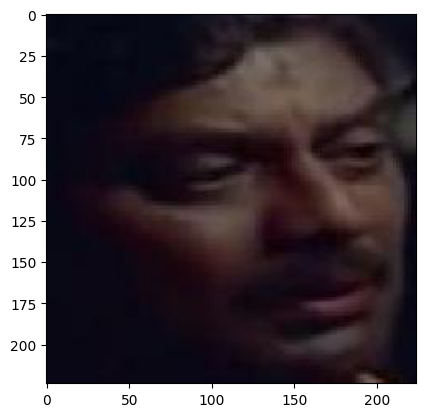

In [75]:
# pulling out the original images from the data which correspond to the validation data
import random as rng
# get a random index to plot image randomly
index = rng.choice(range(len(test_data)))

# get the corresponding image name and probability
img_name = test_data['image_names'][index]
prob = (prediction_probabilities_test * 100).astype(int)[index]

# read the image
img = plt.imread('images/' + img_name)

# print probability and actual class
print('Model is', prob , '% sure that it is male')
print(prediction_probabilities_test[index])
# plot image
plt.imshow(img)

In [76]:
# using relu as activation function in hidden layer
model=Sequential()
model.add(InputLayer(input_shape=X.shape[1],))
model.add(Dense(100,activation='relu',kernel_initializer=he_normal(seed=seed)))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(50,activation='relu',kernel_initializer=he_normal(seed=seed)))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(1,activation='sigmoid',kernel_initializer=he_normal(seed=seed)))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
# summary of the model
model.summary()
#training the model
model_history=model.fit(X,y,batch_size=200,epochs=100,callbacks=[early_stopping])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               1000100   
                                                                 
 batch_normalization_8 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 50)                5050      
                                                                 
 batch_normalization_9 (Batc  (None, 50)               200       
 hNormalization)                                                 
                                                                 
 dropout_9 (Dropout)         (None, 50)               

55/55 [==============================] - 5s 10ms/step - loss: 0.7911 - accuracy: 0.6075
Epoch 2/100
53/55 [===========================>..] - ETA: 0s - loss: 0.6716 - accuracy: 0.6629

55/55 [==============================] - 1s 10ms/step - loss: 0.6694 - accuracy: 0.6641
Epoch 3/100
54/55 [============================>.] - ETA: 0s - loss: 0.6149 - accuracy: 0.6874

55/55 [==============================] - 1s 14ms/step - loss: 0.6148 - accuracy: 0.6869
Epoch 4/100
54/55 [============================>.] - ETA: 0s - loss: 0.5765 - accuracy: 0.7073

55/55 [==============================] - 1s 13ms/step - loss: 0.5762 - accuracy: 0.7079
Epoch 5/100
53/55 [===========================>..] - ETA: 0s - loss: 0.5391 - accuracy: 0.7325

55/55 [==============================] - 1s 15ms/step - loss: 0.5393 - accuracy: 0.7322
Epoch 6/100
54/55 [============================>.] - ETA: 0s - loss: 0.5239 - accuracy: 0.7437

55/55 [==============================] - 1s 14ms/step - loss: 0.5241 - accuracy: 0.7440
Epoch 7/100
52/55 [===========================>..] - ETA: 0s - loss: 0.4993 - accuracy: 0.7587

55/55 [==============================] - 1s 14ms/step - loss: 0.4979 - accuracy: 0.7585
Epoch 8/100
52/55 [===========================>..] - ETA: 0s - loss: 0.4804 - accuracy: 0.7679

55/55 [==============================] - 1s 11ms/step - loss: 0.4784 - accuracy: 0.7688
Epoch 9/100
54/55 [============================>.] - ETA: 0s - loss: 0.4715 - accuracy: 0.7752

55/55 [==============================] - 1s 11ms/step - loss: 0.4708 - accuracy: 0.7758
Epoch 10/100
53/55 [===========================>..] - ETA: 0s - loss: 0.4560 - accuracy: 0.7816

55/55 [==============================] - 1s 10ms/step - loss: 0.4571 - accuracy: 0.7813
Epoch 11/100
54/55 [============================>.] - ETA: 0s - loss: 0.4502 - accuracy: 0.7868

55/55 [==============================] - 1s 10ms/step - loss: 0.4508 - accuracy: 0.7862
Epoch 12/100
53/55 [===========================>..] - ETA: 0s - loss: 0.4372 - accuracy: 0.7940

55/55 [==============================] - 1s 10ms/step - loss: 0.4379 - accuracy: 0.7941
Epoch 13/100
54/55 [============================>.] - ETA: 0s - loss: 0.4301 - accuracy: 0.7962

55/55 [==============================] - 1s 10ms/step - loss: 0.4302 - accuracy: 0.7959
Epoch 14/100
51/55 [==========================>...] - ETA: 0s - loss: 0.4214 - accuracy: 0.7986

55/55 [==============================] - 1s 10ms/step - loss: 0.4216 - accuracy: 0.7979
Epoch 15/100
51/55 [==========================>...] - ETA: 0s - loss: 0.4119 - accuracy: 0.8026

55/55 [==============================] - 1s 10ms/step - loss: 0.4115 - accuracy: 0.8030
Epoch 16/100
52/55 [===========================>..] - ETA: 0s - loss: 0.4157 - accuracy: 0.8008

55/55 [==============================] - 1s 10ms/step - loss: 0.4169 - accuracy: 0.8006
Epoch 17/100
52/55 [===========================>..] - ETA: 0s - loss: 0.3979 - accuracy: 0.8112

55/55 [==============================] - 1s 10ms/step - loss: 0.3986 - accuracy: 0.8110
Epoch 18/100
54/55 [============================>.] - ETA: 0s - loss: 0.3940 - accuracy: 0.8132

55/55 [==============================] - 1s 9ms/step - loss: 0.3940 - accuracy: 0.8132
Epoch 19/100
52/55 [===========================>..] - ETA: 0s - loss: 0.3984 - accuracy: 0.8092

55/55 [==============================] - 1s 10ms/step - loss: 0.3992 - accuracy: 0.8091
Epoch 20/100
53/55 [===========================>..] - ETA: 0s - loss: 0.3875 - accuracy: 0.8168

55/55 [==============================] - 1s 10ms/step - loss: 0.3895 - accuracy: 0.8154
Epoch 21/100
50/55 [==========================>...] - ETA: 0s - loss: 0.3790 - accuracy: 0.8208

55/55 [==============================] - 1s 10ms/step - loss: 0.3791 - accuracy: 0.8203
Epoch 22/100
52/55 [===========================>..] - ETA: 0s - loss: 0.3864 - accuracy: 0.8137

55/55 [==============================] - 1s 10ms/step - loss: 0.3861 - accuracy: 0.8143
Epoch 23/100
52/55 [===========================>..] - ETA: 0s - loss: 0.3817 - accuracy: 0.8162

55/55 [==============================] - 1s 10ms/step - loss: 0.3823 - accuracy: 0.8162
Epoch 24/100
54/55 [============================>.] - ETA: 0s - loss: 0.3749 - accuracy: 0.8249

55/55 [==============================] - 1s 10ms/step - loss: 0.3749 - accuracy: 0.8250
Epoch 25/100
51/55 [==========================>...] - ETA: 0s - loss: 0.3720 - accuracy: 0.8242

55/55 [==============================] - 1s 10ms/step - loss: 0.3694 - accuracy: 0.8265
Epoch 26/100
51/55 [==========================>...] - ETA: 0s - loss: 0.3687 - accuracy: 0.8256

55/55 [==============================] - 1s 11ms/step - loss: 0.3677 - accuracy: 0.8266
Epoch 27/100
53/55 [===========================>..] - ETA: 0s - loss: 0.3707 - accuracy: 0.8245

55/55 [==============================] - 1s 13ms/step - loss: 0.3714 - accuracy: 0.8233
Epoch 28/100
53/55 [===========================>..] - ETA: 0s - loss: 0.3681 - accuracy: 0.8264

55/55 [==============================] - 1s 13ms/step - loss: 0.3691 - accuracy: 0.8257
Epoch 29/100
54/55 [============================>.] - ETA: 0s - loss: 0.3615 - accuracy: 0.8259

55/55 [==============================] - 1s 13ms/step - loss: 0.3616 - accuracy: 0.8253
Epoch 30/100
54/55 [============================>.] - ETA: 0s - loss: 0.3567 - accuracy: 0.8269

55/55 [==============================] - 1s 13ms/step - loss: 0.3568 - accuracy: 0.8267
Epoch 31/100
53/55 [===========================>..] - ETA: 0s - loss: 0.3629 - accuracy: 0.8247

55/55 [==============================] - 1s 14ms/step - loss: 0.3609 - accuracy: 0.8265
Epoch 32/100
51/55 [==========================>...] - ETA: 0s - loss: 0.3539 - accuracy: 0.8340

55/55 [==============================] - 1s 10ms/step - loss: 0.3537 - accuracy: 0.8332
Epoch 33/100
52/55 [===========================>..] - ETA: 0s - loss: 0.3467 - accuracy: 0.8388

55/55 [==============================] - 1s 10ms/step - loss: 0.3491 - accuracy: 0.8373
Epoch 34/100
51/55 [==========================>...] - ETA: 0s - loss: 0.3506 - accuracy: 0.8348

55/55 [==============================] - 1s 10ms/step - loss: 0.3507 - accuracy: 0.8354
Epoch 35/100
53/55 [===========================>..] - ETA: 0s - loss: 0.3446 - accuracy: 0.8370

55/55 [==============================] - 1s 10ms/step - loss: 0.3453 - accuracy: 0.8365
Epoch 36/100
53/55 [===========================>..] - ETA: 0s - loss: 0.3396 - accuracy: 0.8415

55/55 [==============================] - 1s 9ms/step - loss: 0.3413 - accuracy: 0.8401
Epoch 37/100
55/55 [==============================] - ETA: 0s - loss: 0.3448 - accuracy: 0.8325

55/55 [==============================] - 1s 9ms/step - loss: 0.3448 - accuracy: 0.8325
Epoch 38/100
51/55 [==========================>...] - ETA: 0s - loss: 0.3383 - accuracy: 0.8398

55/55 [==============================] - 0s 9ms/step - loss: 0.3389 - accuracy: 0.8393
Epoch 39/100
54/55 [============================>.] - ETA: 0s - loss: 0.3398 - accuracy: 0.8403

55/55 [==============================] - 1s 9ms/step - loss: 0.3391 - accuracy: 0.8409
Epoch 40/100
53/55 [===========================>..] - ETA: 0s - loss: 0.3381 - accuracy: 0.8412

55/55 [==============================] - 1s 10ms/step - loss: 0.3393 - accuracy: 0.8410
Epoch 41/100
51/55 [==========================>...] - ETA: 0s - loss: 0.3316 - accuracy: 0.8452

55/55 [==============================] - 1s 10ms/step - loss: 0.3320 - accuracy: 0.8448
Epoch 42/100
50/55 [==========================>...] - ETA: 0s - loss: 0.3242 - accuracy: 0.8453

55/55 [==============================] - 1s 10ms/step - loss: 0.3239 - accuracy: 0.8459
Epoch 43/100
53/55 [===========================>..] - ETA: 0s - loss: 0.3274 - accuracy: 0.8453

55/55 [==============================] - 1s 10ms/step - loss: 0.3261 - accuracy: 0.8463
Epoch 44/100
54/55 [============================>.] - ETA: 0s - loss: 0.3284 - accuracy: 0.8469

55/55 [==============================] - 1s 10ms/step - loss: 0.3289 - accuracy: 0.8466
Epoch 45/100
55/55 [==============================] - ETA: 0s - loss: 0.3291 - accuracy: 0.8458

55/55 [==============================] - 0s 9ms/step - loss: 0.3291 - accuracy: 0.8458
Epoch 46/100
52/55 [===========================>..] - ETA: 0s - loss: 0.3313 - accuracy: 0.8432

55/55 [==============================] - 1s 10ms/step - loss: 0.3305 - accuracy: 0.8436
Epoch 47/100
53/55 [===========================>..] - ETA: 0s - loss: 0.3206 - accuracy: 0.8508

55/55 [==============================] - 1s 9ms/step - loss: 0.3209 - accuracy: 0.8506
Epoch 48/100
53/55 [===========================>..] - ETA: 0s - loss: 0.3235 - accuracy: 0.8493

55/55 [==============================] - 1s 10ms/step - loss: 0.3256 - accuracy: 0.8479
Epoch 49/100
53/55 [===========================>..] - ETA: 0s - loss: 0.3167 - accuracy: 0.8515

55/55 [==============================] - 1s 10ms/step - loss: 0.3163 - accuracy: 0.8518
Epoch 50/100
55/55 [==============================] - ETA: 0s - loss: 0.3141 - accuracy: 0.8530

55/55 [==============================] - 1s 12ms/step - loss: 0.3141 - accuracy: 0.8530
Epoch 51/100
53/55 [===========================>..] - ETA: 0s - loss: 0.3062 - accuracy: 0.8610

55/55 [==============================] - 1s 14ms/step - loss: 0.3067 - accuracy: 0.8600
Epoch 52/100
54/55 [============================>.] - ETA: 0s - loss: 0.3147 - accuracy: 0.8592

55/55 [==============================] - 1s 13ms/step - loss: 0.3145 - accuracy: 0.8591
Epoch 53/100
53/55 [===========================>..] - ETA: 0s - loss: 0.3167 - accuracy: 0.8536

55/55 [==============================] - 1s 14ms/step - loss: 0.3169 - accuracy: 0.8536
Epoch 54/100
54/55 [============================>.] - ETA: 0s - loss: 0.3174 - accuracy: 0.8498

55/55 [==============================] - 1s 14ms/step - loss: 0.3171 - accuracy: 0.8501
Epoch 55/100
51/55 [==========================>...] - ETA: 0s - loss: 0.3015 - accuracy: 0.8555

55/55 [==============================] - 1s 13ms/step - loss: 0.3021 - accuracy: 0.8545
Epoch 56/100
54/55 [============================>.] - ETA: 0s - loss: 0.3031 - accuracy: 0.8601

55/55 [==============================] - 1s 10ms/step - loss: 0.3035 - accuracy: 0.8598
Epoch 57/100
52/55 [===========================>..] - ETA: 0s - loss: 0.2995 - accuracy: 0.8632

55/55 [==============================] - 1s 10ms/step - loss: 0.2995 - accuracy: 0.8634
Epoch 58/100
51/55 [==========================>...] - ETA: 0s - loss: 0.3065 - accuracy: 0.8583

55/55 [==============================] - 1s 10ms/step - loss: 0.3045 - accuracy: 0.8597
Epoch 59/100
52/55 [===========================>..] - ETA: 0s - loss: 0.3024 - accuracy: 0.8591

55/55 [==============================] - 1s 10ms/step - loss: 0.3053 - accuracy: 0.8566
Epoch 60/100
55/55 [==============================] - ETA: 0s - loss: 0.2932 - accuracy: 0.8624

55/55 [==============================] - 1s 9ms/step - loss: 0.2932 - accuracy: 0.8624
Epoch 61/100
50/55 [==========================>...] - ETA: 0s - loss: 0.2983 - accuracy: 0.8591

55/55 [==============================] - 1s 10ms/step - loss: 0.3001 - accuracy: 0.8585
Epoch 62/100
53/55 [===========================>..] - ETA: 0s - loss: 0.3000 - accuracy: 0.8624

55/55 [==============================] - 1s 10ms/step - loss: 0.3011 - accuracy: 0.8618
Epoch 63/100
52/55 [===========================>..] - ETA: 0s - loss: 0.2874 - accuracy: 0.8667

55/55 [==============================] - 1s 10ms/step - loss: 0.2882 - accuracy: 0.8669
Epoch 64/100
54/55 [============================>.] - ETA: 0s - loss: 0.3001 - accuracy: 0.8578

55/55 [==============================] - 1s 10ms/step - loss: 0.3005 - accuracy: 0.8577
Epoch 65/100
53/55 [===========================>..] - ETA: 0s - loss: 0.2872 - accuracy: 0.8641

55/55 [==============================] - 1s 9ms/step - loss: 0.2888 - accuracy: 0.8635
Epoch 66/100
52/55 [===========================>..] - ETA: 0s - loss: 0.2898 - accuracy: 0.8659

55/55 [==============================] - 1s 10ms/step - loss: 0.2889 - accuracy: 0.8660
Epoch 67/100
51/55 [==========================>...] - ETA: 0s - loss: 0.2882 - accuracy: 0.8670

55/55 [==============================] - 1s 10ms/step - loss: 0.2878 - accuracy: 0.8668
Epoch 68/100
53/55 [===========================>..] - ETA: 0s - loss: 0.2946 - accuracy: 0.8625

55/55 [==============================] - 1s 10ms/step - loss: 0.2946 - accuracy: 0.8629
Epoch 69/100
51/55 [==========================>...] - ETA: 0s - loss: 0.2787 - accuracy: 0.8759

55/55 [==============================] - 1s 10ms/step - loss: 0.2797 - accuracy: 0.8750
Epoch 70/100
54/55 [============================>.] - ETA: 0s - loss: 0.2809 - accuracy: 0.8711

55/55 [==============================] - 1s 10ms/step - loss: 0.2822 - accuracy: 0.8703
Epoch 71/100
52/55 [===========================>..] - ETA: 0s - loss: 0.2839 - accuracy: 0.8657

55/55 [==============================] - 1s 10ms/step - loss: 0.2845 - accuracy: 0.8656
Epoch 72/100
51/55 [==========================>...] - ETA: 0s - loss: 0.2796 - accuracy: 0.8722

55/55 [==============================] - 1s 10ms/step - loss: 0.2811 - accuracy: 0.8707
Epoch 73/100
53/55 [===========================>..] - ETA: 0s - loss: 0.2828 - accuracy: 0.8677

55/55 [==============================] - 1s 11ms/step - loss: 0.2820 - accuracy: 0.8681
Epoch 74/100
53/55 [===========================>..] - ETA: 0s - loss: 0.2789 - accuracy: 0.8724

55/55 [==============================] - 1s 14ms/step - loss: 0.2806 - accuracy: 0.8715
Epoch 75/100
52/55 [===========================>..] - ETA: 0s - loss: 0.2770 - accuracy: 0.8719

55/55 [==============================] - 1s 14ms/step - loss: 0.2778 - accuracy: 0.8711
Epoch 76/100
53/55 [===========================>..] - ETA: 0s - loss: 0.2771 - accuracy: 0.8754

55/55 [==============================] - 1s 14ms/step - loss: 0.2771 - accuracy: 0.8751
Epoch 77/100
53/55 [===========================>..] - ETA: 0s - loss: 0.2671 - accuracy: 0.8785

55/55 [==============================] - 1s 13ms/step - loss: 0.2681 - accuracy: 0.8784
Epoch 78/100
55/55 [==============================] - ETA: 0s - loss: 0.2771 - accuracy: 0.8732

55/55 [==============================] - 1s 13ms/step - loss: 0.2771 - accuracy: 0.8732
Epoch 79/100
55/55 [==============================] - ETA: 0s - loss: 0.2755 - accuracy: 0.8757

55/55 [==============================] - 1s 10ms/step - loss: 0.2755 - accuracy: 0.8757
Epoch 80/100
53/55 [===========================>..] - ETA: 0s - loss: 0.2680 - accuracy: 0.8793

55/55 [==============================] - 1s 10ms/step - loss: 0.2682 - accuracy: 0.8797
Epoch 81/100
54/55 [============================>.] - ETA: 0s - loss: 0.2726 - accuracy: 0.8743

55/55 [==============================] - 1s 10ms/step - loss: 0.2713 - accuracy: 0.8750
Epoch 82/100
52/55 [===========================>..] - ETA: 0s - loss: 0.2680 - accuracy: 0.8799

55/55 [==============================] - 1s 10ms/step - loss: 0.2686 - accuracy: 0.8797
Epoch 83/100
53/55 [===========================>..] - ETA: 0s - loss: 0.2695 - accuracy: 0.8766

55/55 [==============================] - 1s 10ms/step - loss: 0.2689 - accuracy: 0.8770
Epoch 84/100
55/55 [==============================] - ETA: 0s - loss: 0.2652 - accuracy: 0.8773

55/55 [==============================] - 1s 10ms/step - loss: 0.2652 - accuracy: 0.8773
Epoch 85/100
51/55 [==========================>...] - ETA: 0s - loss: 0.2663 - accuracy: 0.8797

55/55 [==============================] - 1s 11ms/step - loss: 0.2684 - accuracy: 0.8792
Epoch 86/100
51/55 [==========================>...] - ETA: 0s - loss: 0.2698 - accuracy: 0.8779

55/55 [==============================] - 1s 10ms/step - loss: 0.2702 - accuracy: 0.8774
Epoch 87/100
52/55 [===========================>..] - ETA: 0s - loss: 0.2685 - accuracy: 0.8787

55/55 [==============================] - 1s 10ms/step - loss: 0.2704 - accuracy: 0.8780
Epoch 88/100
54/55 [============================>.] - ETA: 0s - loss: 0.2596 - accuracy: 0.8851

55/55 [==============================] - 1s 10ms/step - loss: 0.2610 - accuracy: 0.8842
Epoch 89/100
52/55 [===========================>..] - ETA: 0s - loss: 0.2540 - accuracy: 0.8865

55/55 [==============================] - 1s 10ms/step - loss: 0.2542 - accuracy: 0.8858
Epoch 90/100
54/55 [============================>.] - ETA: 0s - loss: 0.2588 - accuracy: 0.8804

55/55 [==============================] - 1s 10ms/step - loss: 0.2595 - accuracy: 0.8797
Epoch 91/100
53/55 [===========================>..] - ETA: 0s - loss: 0.2601 - accuracy: 0.8825

55/55 [==============================] - 1s 10ms/step - loss: 0.2612 - accuracy: 0.8821
Epoch 92/100
52/55 [===========================>..] - ETA: 0s - loss: 0.2622 - accuracy: 0.8817

55/55 [==============================] - 1s 10ms/step - loss: 0.2609 - accuracy: 0.8821
Epoch 93/100
54/55 [============================>.] - ETA: 0s - loss: 0.2533 - accuracy: 0.8844

55/55 [==============================] - 1s 10ms/step - loss: 0.2535 - accuracy: 0.8843
Epoch 94/100
53/55 [===========================>..] - ETA: 0s - loss: 0.2595 - accuracy: 0.8843

55/55 [==============================] - 1s 11ms/step - loss: 0.2593 - accuracy: 0.8847
Epoch 95/100
51/55 [==========================>...] - ETA: 0s - loss: 0.2599 - accuracy: 0.8814

55/55 [==============================] - 1s 10ms/step - loss: 0.2592 - accuracy: 0.8819
Epoch 96/100
51/55 [==========================>...] - ETA: 0s - loss: 0.2518 - accuracy: 0.8890

55/55 [==============================] - 1s 10ms/step - loss: 0.2538 - accuracy: 0.8877
Epoch 97/100
51/55 [==========================>...] - ETA: 0s - loss: 0.2594 - accuracy: 0.8851

55/55 [==============================] - 1s 13ms/step - loss: 0.2594 - accuracy: 0.8855
Epoch 98/100
52/55 [===========================>..] - ETA: 0s - loss: 0.2552 - accuracy: 0.8861

55/55 [==============================] - 1s 13ms/step - loss: 0.2546 - accuracy: 0.8855
Epoch 99/100
54/55 [============================>.] - ETA: 0s - loss: 0.2516 - accuracy: 0.8844

55/55 [==============================] - 1s 13ms/step - loss: 0.2506 - accuracy: 0.8852
Epoch 100/100
55/55 [==============================] - ETA: 0s - loss: 0.2449 - accuracy: 0.8887

55/55 [==============================] - 1s 13ms/step - loss: 0.2449 - accuracy: 0.8887


In [101]:
# getting predictions in the form of class as well as probabilities

prediction_train = model.predict(X)[:, 0]
prediction_train = prediction_train.reshape(-1,)

# converting probabilities to classes
prediction_train = prediction_train >= 0.5
prediction_train = prediction_train.astype(np.int)

In [79]:
# accuracy on training set
print('Accuracy on training set:', accuracy_score(y,prediction_train), '%')

Accuracy on training set: 0.9383424408014572 %


**Well we will be able to increase the accuracy score upto 93 while adding dropout, weight initializers, early stopping etc **

164/164 [==============================] - 0s 2ms/step
Model is 100 % sure that it is male
1


<ipython-input-88-5287d3f9cd44>:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prediction_probabilities_test = prediction_probabilities_test.astype(np.int)


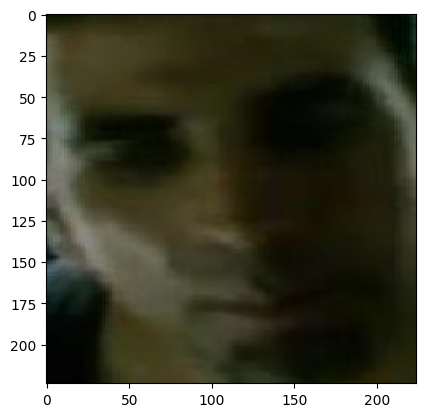

In [88]:
# getting predictions in the form of probabilities
#prediction for test data
prediction_probabilities_test = model.predict(X_test)[:,0]
# converting probabilities to classes
prediction_probabilities_test= prediction_probabilities_test >= 0.5
prediction_probabilities_test = prediction_probabilities_test.astype(np.int)
# pulling out the original images from the data which correspond to the validation data
import random as rng
# get a random index to plot image randomly
index = rng.choice(range(len(test_data)))

# get the corresponding image name and probability
img_name = test_data['image_names'][index]
prob = (prediction_probabilities_test * 100).astype(int)[index]

# read the image
img = plt.imread('images/' + img_name)

# print probability and actual class
print('Model is', prob , '% sure that it is male')
print(prediction_probabilities_test[index])
# plot image
plt.imshow(img)

In [89]:
prediction_probabilities_test

array([1, 1, 0, ..., 0, 0, 0])

In [91]:
#solution data frame
solution=pd.DataFrame({'image_names':test_data.image_names,'class':prediction_probabilities_test})

In [102]:
solution.to_csv('solution.csv')

In [103]:
#top five rows of solution
solution.head()

,image_names,class
0,5603.jpg,1
1,1286.jpg,1
2,9815.jpg,0
3,8865.jpg,0
4,9306.jpg,1
